In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [2]:
df=pd.read_csv("data.csv",sep=";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
df.isnull().sum()


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [4]:
unique_nationalities = df["Nacionality"].unique()
print(unique_nationalities)

[  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]


In [5]:
##Each Unique Integer Represents a Country 
#1 Portuguese
#62 Romanian
#6 Spanish
#41 Brazilian
#26 Santomean
#103 Ukrainian
#13 Dutch
#25 Mozambican
#21 Angolan
#101 Mexican
#11 Italian
#22 Cape Verdean
#32 Turkish
#100 Moldovian
#24 Guinean
#109 Colombian
#2 German
#108 Cuban
#105 Russian 
#14 English
#17 Lithuanian 

In [6]:
cross_tab = pd.crosstab(df["Nacionality"], df["Target"])

print(cross_tab)

Target       Dropout  Enrolled  Graduate
Nacionality                             
1               1389       770      2155
2                  0         0         2
6                  4         5         4
11                 0         0         3
13                 0         0         1
14                 0         0         1
17                 1         0         0
21                 1         1         0
22                 4         1         8
24                 1         0         4
25                 0         1         1
26                 1         5         8
32                 0         1         0
41                14         6        18
62                 0         1         1
100                2         1         0
101                1         0         1
103                1         0         2
105                1         1         0
108                0         1         0
109                1         0         0


In [7]:
cross_tab = pd.crosstab(df["International"], df["Target"])

print(cross_tab)

Target         Dropout  Enrolled  Graduate
International                             
0                 1389       770      2155
1                   32        24        54


In [8]:
X = df[["Nacionality", "International"]]
y = df["Target"] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:
print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Model Accuracy: 0.47344632768361583
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.50      0.00      0.01       316
    Enrolled       0.00      0.00      0.00       151
    Graduate       0.47      1.00      0.64       418

    accuracy                           0.47       885
   macro avg       0.32      0.33      0.22       885
weighted avg       0.40      0.47      0.31       885



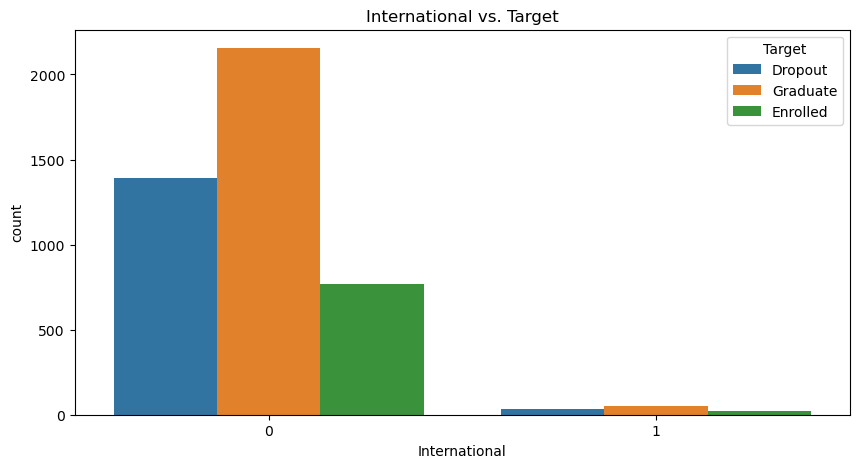

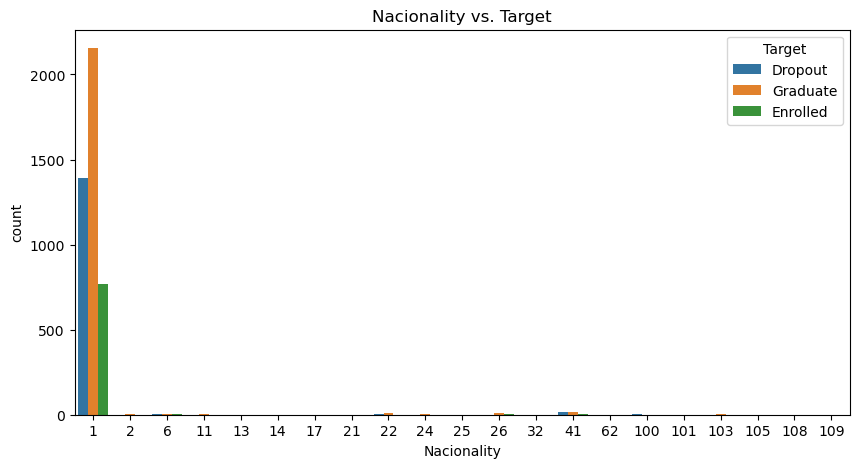

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="International", hue="Target")
plt.title("International vs. Target")
plt.savefig("International_vs_Target_Similiar.png")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Nacionality", hue="Target")
plt.title("Nacionality vs. Target")
plt.show()

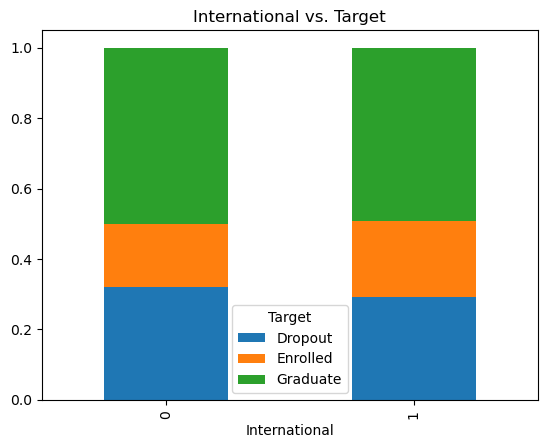

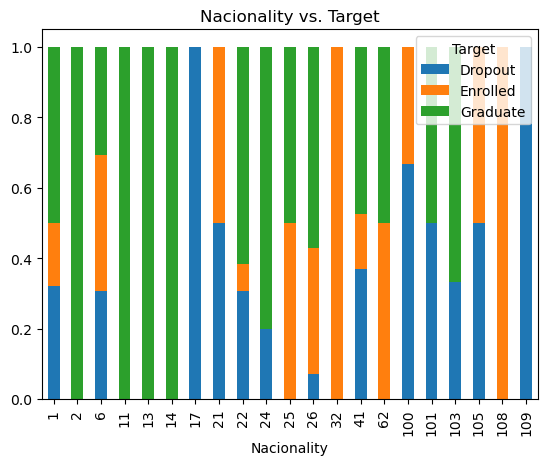

In [14]:
cross_tab_international = pd.crosstab(df["International"], df["Target"])
cross_tab_international.div(cross_tab_international.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title("International vs. Target")
plt.savefig("International_vs_Target.png")
plt.show()

cross_tab_nacionality = pd.crosstab(df["Nacionality"], df["Target"])
cross_tab_nacionality.div(cross_tab_nacionality.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title("Nacionality vs. Target")
plt.savefig("Nacionality_vs_Target.png")
plt.show()

In [15]:
label_encoder = LabelEncoder()

df["Nacionality"] = label_encoder.fit_transform(df["Nacionality"])
df["Target"] = label_encoder.fit_transform(df["Target"])

correlation, p_value = stats.pointbiserialr(df["Nacionality"], df["Target"])
print(f"Point-Biserial Correlation: {correlation}")
print(f"P-Value: {p_value}")

correlation, p_value = stats.pointbiserialr(df["Nacionality"], df["Target"])

print(f"Point-Biserial Correlation: {correlation}")
print(f"P-Value: {p_value}")

Point-Biserial Correlation: -0.00474039808864421
P-Value: 0.7526010654248105
Point-Biserial Correlation: -0.00474039808864421
P-Value: 0.7526010654248105


In [16]:
X = df[["Nacionality", "International","Inflation rate"]]  
y = df["Target"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Model Accuracy: 0.4711864406779661
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.01      0.01       316
           1       0.29      0.01      0.03       151
           2       0.47      0.99      0.64       418

    accuracy                           0.47       885
   macro avg       0.35      0.34      0.23       885
weighted avg       0.37      0.47      0.31       885



In [17]:
X = df[["Inflation rate"]]  
y = df["Target"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Model Accuracy: 0.47231638418079097
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       316
           1       0.00      0.00      0.00       151
           2       0.47      1.00      0.64       418

    accuracy                           0.47       885
   macro avg       0.16      0.33      0.21       885
weighted avg       0.22      0.47      0.30       885



C:\Users\justi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\justi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\justi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Random Forest Model Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Random Forest Model Accuracy: 0.47231638418079097
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       316
           1       0.00      0.00      0.00       151
           2       0.47      1.00      0.64       418

    accuracy                           0.47       885
   macro avg       0.16      0.33      0.21       885
weighted avg       0.22      0.47      0.30       885



C:\Users\justi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\justi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\justi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\justi\AppData\Local\Temp\ipykernel_11024\3727812395.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Inflation rate', y='Target', data=df, ci=None)


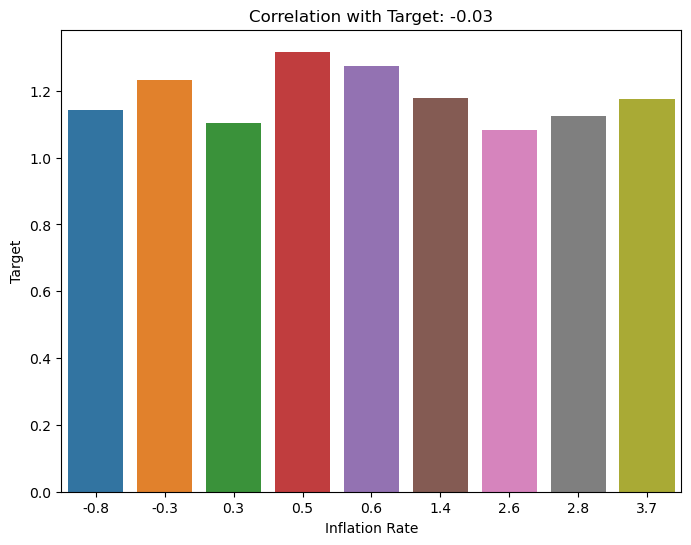

In [21]:
correlation = df['Inflation rate'].corr(df['Target'])

plt.figure(figsize=(8, 6))
sns.barplot(x='Inflation rate', y='Target', data=df, ci=None)
plt.title(f'Correlation with Target: {correlation:.2f}')
plt.xlabel('Inflation Rate')

plt.ylabel('Target')

plt.show()

In [22]:
X = df[["Nacionality", "International", "Scholarship holder"]]
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Model Accuracy: 0.4689265536723164
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.01      0.02       316
           1       0.00      0.00      0.00       151
           2       0.47      0.99      0.64       418

    accuracy                           0.47       885
   macro avg       0.25      0.33      0.22       885
weighted avg       0.32      0.47      0.31       885

